## Why I Wrote this Blog & Overview
I found embeddings tricky to understand each time I encountered them, everyone described them as wildly useful but I couldn't get an intuitive sense of them from any single source as everyone described them as useful for entirely different reasons.


After some wide reading from wonderful, smart people that I admire a lot, I have a more mechanical 'feeling' for them and **I want to pull together the sources that helped me and attempt to summarise their helpful work. This page acting as a one stop shop to understand embeddings and see their application.**

Of course I recommend you read the original articles in their entirety and I make no attempt to represent their work, I only want to share the great sources I've found on the topic and add my 2 cents to what I gathered from their work.

## Hydra Head 1 | The Original Paper | Learn Relationships Between Categories & Map them in Space

[Here's the original paper on arxiv](https://arxiv.org/pdf/1604.06737.pdf). Its honestly an excellent read, I often find the jargon and esoteric references in academic papers quite difficult to digest efficiently but this is understandable and clear. I'll admit that the original paper isn't where embeddings "sunk in" for me, Will Koerhesen's write up (Hydra Head 3) and fastai's tactile application (Hydra Head 2) was the penny drop but re-reading the original paper after experiencing their work really solidified what they are talking about. This paper is the origin, embeddings mecca, its important to visit and inspect the original inscriptions! I think the authors (Cheng Guo and Felix Berkhahn) do a great job of explaining the categories -> continous space mapping concept of embeddings. There's a wonderful practicality to this paper in the sense they both provide empirical guidance for configuring embeddings when you're working with them as well as proof that they did damn well in a competitive Kaggle environment using their invention.

I enjoy the early discussion on structured data competitions (often in Kaggle) showing dominance for tree based methods as trees can slice any category perfectly and sharply but neural nets by nature are continous functions. There's also lovely discussion on the shortcomings of one hot encodings in order to deal with the independence of categories that simply get mapped to integers. This early problem phrasing is concisely written and expresses the problem clearly. Can't say enough nice things about this dang paper, give it a read!

Section IV does a great job at explaining the naive problems with mapping categories to numbers and then pumping those into a model. The last sentence is a fantastic summary: **"The task of entity embedding is to map discrete values to a multi dimensional space where the values with similar function output are close to each other."**

Section VI noted Experiments provides exciting results when they prove that feeding the embeddings back into the other methods compared to neural nets (KNN, Random Forests, Gradient Boosted Trees) all improved their results by a significant margin, often halving or chopping it in thirds. These results seems shocking to me for some reason despite the clear explanation of why having a continous mapping space of categories is useful. You would think that tree models split well and can have jagged movements when making decisions and a continous mapping wouldn't add that much to its predictive power, but alas I'm dead wrong by intuition. Their visual proofs of how these embeddings correlate to real facts like geographic location is also shocking, how on earth does it learn shops are near eachother physically?! I guess you could pontificate that shoppers of a particular area have a unique signature but surely its too subtle to have such a stark demonstration of accuracy. You wouldn't think people in the north of germany buy milk and eggs that differently than the south but again, my gut leads me astray...

## Hydra Head 2: Fastai | Index into a One Hot Encoded Matrix - Computationally Fantastic
[Fastai (Colab link)](https://colab.research.google.com/github/fastai/fastbook/blob/master/08_collab.ipynb#scrollTo=rK9faI7a0bbW) [(Video Lecture)](https://www.youtube.com/watch?v=cX30jxMNBUw&t=5110s) has the most practical explanation and explains a collaborative filtering example for movies as a practical use of embeddings. Fastai walks through the computational shortcut of embeddings extremely clearly with a step by step build up to the pytorch module which I love.

Fastai's teaching style is unique in the sense its firstly top down (see the whole baseball game) and then bottom up from basic heuristics that show the kind of thinking required before moving on to a recreation of the deep learning library you rely on. Everything feels 'mechanical' and grounded whilst also giving you extensive time and examples to work through each step to make sure you understand. They've spent a lot of time on their teaching method and it shows up in oodles.

## Hydra Head 3: Will Koerhesen | Clarity of Categorical Variables & Reduce Dimensionality
[Will Koerhesen is an intuitive explanation I love](https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526)

Before we talk about Will's work,I want to point out that Will is a prolific and brilliant writer, his github and blogs are endless treasure troves of great work, please read and investigate his other work. I genuinely hope that one day I build up such a beautiful portfolio of work to discuss with people.

Will has a great distillation of 'what' embeddings are in his first few lines: **An embedding is a mapping of a discrete — categorical — variable to a vector of continuous numbers. In the context of neural networks, embeddings are low-dimensional, learned continuous vector representations of discrete variables.**

and 'Why' they are valuable: 
Neural network embeddings are useful because they can reduce the dimensionality of categorical variables and **meaningfully represent categories in the transformed space.**

There is a focus on understanding that a large value of embeddings is the visualisation aspect of mapping out the learned embeddings into a graph showing the categories of similar meaning close to eachother in space. In particular there is a short writeup of TSNE (T-distributed Stochastic Neighbor Embedding) as a method of quickly reducing dimensions to the visually inspectable 2 whilst also explaining the drawbacks of this visualisation not being replicable like PCA since it is stochastic whereas PCA is not. He references Uniform Manifold Approximation and Projection or UMAP as a TSNE alternative which I was unaware of but am now curious about!


## Hydra Head 4: My Thoughts | Learn Latent Variables and Category Understanding + Lets Make Some

Ok now that we've got a few excellent sources of embeddings understanding, lets make some ourselves with some different datasets. We've seen wikipedia and books with Will, movies with Jeremy and store sales with the original paper; already amazing that the same technique is useful for such different applications. I am fascinated by the kind of visualisations and relationships that pop up in embeddings but I will warn you that its not a huge party starter if you start describing them to undeserving party-goers.

My personal thoughts on embeddings are that they are a great way of learning a categorical dimension's relationships for both your intuition on visual inspection of the dimension reduced visualisation and for your model. This is fantastically helpful for understanding a dataset and embeddings are emperically powerful for your models, no matter if its for another neural net or a random forest etc as proven by the original paper.

### Wine Embeddings

Lets look at wine reviews and see if there are any interesting patterns emerging.

[Data Source](https://www.kaggle.com/zynicide/wine-reviews)



In [1]:
import fastai
from fastai.collab import *
from fastai.tabular.all import *
import pandas as pd

In [2]:
wine = pd.read_csv("../data/wine/winemag-data-130k-v2.csv")

In [3]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks


Lets re-arrange the titles to fit the CollabDataLoaders expected format of user, title, rating

In [4]:
wine_ratings = wine[["taster_name","title","points"]]

In [5]:
wine_ratings.head()

,taster_name,title,points
0,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),87
1,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),87
2,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),87
3,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),87
4,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),87


In [6]:
dls = CollabDataLoaders.from_df(wine_ratings, item_name='title', bs=128)

In [7]:
dls.show_batch()

,taster_name,title,points
0,Sean P. Sullivan,Syncline 2014 Grüner Veltliner (Columbia Gorge (WA)),90
1,Roger Voss,Manfred Weiss 2010 Eiswein Grüner Veltliner (Neusiedlersee),84
2,Kerin O’Keefe,Rivetto 2009 Briccolina (Barolo),93
3,Virginie Boone,Cabot Vineyards 2007 Merlot (Humboldt County),87
4,Michael Schachner,François Lurton 2009 Gran Lurton Cabernet Sauvignon (Mendoza),88
5,Michael Schachner,Monteviejo 2013 Festivo Torrontés (La Rioja),86
6,Kerin O’Keefe,Cantine Povero 2014 Batù (Barbaresco),87
7,#na#,Von Strasser 2005 Sori Bricco Vineyard Cabernet Sauvignon (Diamond Mountain District),95
8,Roger Voss,Château les Valentines 2014 Rosé (Côtes de Provence),90
9,Michael Schachner,Ribas del Cúa 2003 Privilegio Mencía (Bierzo),87


In [8]:
learn = collab_learner(dls, y_range=(0, 100))

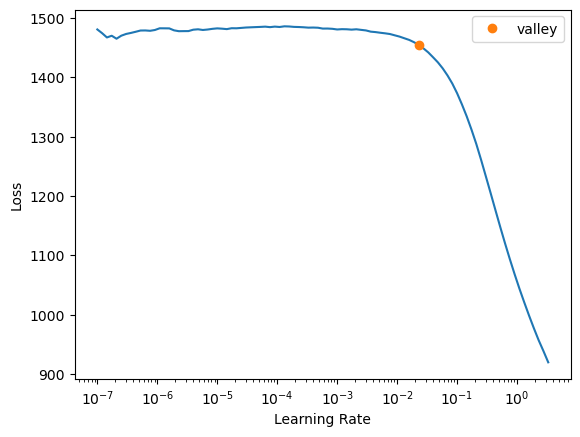

In [9]:
x = learn.lr_find()

In [11]:
learn.fit_one_cycle(5, x.valley, wd=0.1)

epoch,train_loss,valid_loss,time
0,10.466120,9.332251,00:12
1,7.815901,8.592141,00:12
2,5.880339,8.771120,00:13
3,3.763582,8.126672,00:12
4,1.618028,7.956092,00:12


I've heavily ripped Jeremy's code from his lesson 8 collaborative filtering and simply swapped out my embedding weights and used Altair instead for plotting purposes.

In [12]:
import altair as alt

def make_embeddings(size=50):
    g = wine.groupby('title')['points'].count()
    top_wine = g.sort_values(ascending=False).index.values[:5000]
    top_idxs = tensor([learn.dls.classes["title"].o2i[m] for m in top_wine])
    wine_w = learn.model.i_weight.weight[top_idxs].cpu().detach()
    wine_pca = wine_w.pca(3)
    fac0, fac1, fac2 = wine_pca.t()
    idxs = list(range(size))
    X = fac0[idxs]
    Y = fac2[idxs]

    source = pd.DataFrame(data={'x':X,'y':Y,'title':top_wine[idxs]})
    source["sparkling"] = source.title.str.contains("Sparkling",case=False)
    df = wine.merge(source,on="title")
    return df
    

In [13]:
def plot_embeddings(data,color="country:N",tooltip=["title:N","province:N","sparkling:N","country:N"],selection="country"):
    
    axis = alt.Axis(labels=False, domain=False, ticks=False,grid=False)
    selection = alt.selection_multi(fields=[selection],bind='legend')

    x = alt.X("x",title="",axis=axis)
    y = alt.Y("y",title="",axis=axis)

    plot = alt.Chart(data,title="Wine Embeddings").mark_circle().encode(
    x=x,
    y=y,
    color=color,
    tooltip=tooltip,
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))).add_selection(selection)
    
    return plot

In [14]:
alt.themes.enable("urbaninstitute")

ThemeRegistry.enable('urbaninstitute')

All of these plots are interactive, in particular you can select any category in the legend to highlight them and specify a particular class you want to show. Click on empty space to go back to the default.

In [20]:
df = make_embeddings(500)
plot_embeddings(df)

alt.Chart(...)

Amazing, without any geographical data, there are still streaks and clusters of regions. In particular you can see France running in a streak running left to right and California is a streak running up and down with a grouping in the middle. Spanish wines are also a vertical vector running top to bottom with some southerly outliers on the bottom spoke, I see you wonderful Spanish wines.... Remember these embeddings were only trained on a user, their wine they were rating and the rating of that wine, no geo dimensions included.

In [21]:
plot_embeddings(df,color="sparkling",selection="sparkling")

alt.Chart(...)

Sparkling wines have a direction here as well, there is a defined vector up and down of sparkling wines being clustered together despite there being no information whatsoever of whether the wine had bubbles or not in the data. How awesome is this.

Lets plot 300 of the wines to see more data... These larger plots are interactive so please zoom in with your mouse scroll wheel and inspect the embedding regions as well as highlight countries of interest.

In [22]:
source = make_embeddings(size=500)
plot_embeddings(source).interactive()

alt.Chart(...)

Not as helpful with this many categories but its quite beautiful I think... If you highlight Australia you can see a nice little cluster, Italy has a strong vertical presence. You can clearly see the French dominance through the middle however

In [23]:
df = make_embeddings(size=150)
plot_embeddings(df).interactive()

alt.Chart(...)

This is probably as many wines as you could reasonably look at, again its cool to see at the middle the American wines grouped together in the Anderson and Napa Valleys.

### Food Embeddings

I will revisit this at a later date and show some embeddings for a food database

[Data Source](https://www.kaggle.com/openfoodfacts/world-food-facts)

### Tensorboard Trial

[Source Tutorial](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)
I'd also love to come back and implement Tensorboard with these embeddings so that they are more interactive to explore